In [1]:
import requests
import os
import json
import pprint
from time import sleep
import sched
from datetime import datetime
from time import sleep
import time
from IPython.display import clear_output

In [2]:
def clear():
    os.system('cls')

In [3]:
def reqAPI():
    try:
        r = requests.get('https://www.cryptopia.co.nz/api/GetMarkets/BTC')
        coins = json.loads(r.text)['Data']
        if coins is not None:
            return coins #lista de diccionarios 
    except ValueError:
        print('Error al hacer el request, intentando nuevamente')
        reqAPI()

In [37]:
def refreshData():
    #API REQUEST
    lenDic, coc, last, volC, bVol = 0, 0, 0, 0, 0
    ask, bid, spread = 0, 0, 0
    old, recent = 0, 0
    coins = reqAPI()
    while coins is None:
        coins = reqAPI()
        print(type(coins))
    for y in coins:
        changeDic = {}
        name = y['Label']
        if name in dic:
            lenDic = len(dic[name])
        else:
            dic[name] = {}
        ts = datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')
        if y['BidPrice'] != 0:
            spread = ((y['AskPrice']/y['BidPrice'])-1)*100
            spread = round(spread, 2)
        changeDic = {'last':y['LastPrice'],
                    'sprd':spread,
                    'chng':y['Change'],
                    'vol': (0, y['Volume']),
                    'buyVol': (0, y['BuyVolume'])}
        if lenDic != 0: #Si hay registros de precios
            #Cambio
            recent = [*dic[name]][lenDic-1] #Compara con el más reciente
            last = dic[name][recent]['last']
            coc = round((y['LastPrice']/last)-1, 2)
            #Volumen
            last = dic[name][recent]['vol'][1] #Compara el volumen más reciente
            #Captura de los valores viejo y nuevo
            changeDic['vol'] = (last, y['Volume'])
            if last != 0:
                volC = round((y['Volume']/last)-1, 2)
            elif y['Volume'] == 0:
                volC = 0
            else:
                volC = 1
            #BuyVolume
            last = dic[name][recent]['buyVol'][1] #(    ,****) 
            changeDic['buyVol'] = (last, y['BuyVolume'])
            if last != 0:
                bVol = round(y['BuyVolume']/last-1, 2)
            elif y['BuyVolume'] == 0:
                bVol = 0
            else:
                bVol = 1
            changeDic['bvc'] = bVol
            changeDic['coc'] = coc
            changeDic['volC'] = volC
            if coc > 0.05 or volC > 0.05 or bVol > 0.05 : #Si el cambio en precios o en volumen es mayor al 5%
                if not name in toBuy:
                    toBuy[name] = {}
                toBuy[name][ts] = changeDic
                if name not in top: #Si no existe se agrega el primero
                    top[name] = [coc, volC, bVol]
                else: #Compara c/u para buscar el máximo
                    if top[name][0] < coc:
                        top[name][0] = coc
                    if top[name][1] < volC:
                        top[name][1] = volC
                    if top[name][2] < bVol:
                        top[name][2] = bVol
        if lenDic == 5: 
            old = [*dic[name]][0] #Registro más viejo
            dic[name].pop(old)
        #Inserta el nuevo
        dic[name][ts] = changeDic

In [38]:
#Variables
#Diccionarios con los datos
def analiza(n):
    i = 0
    suma = 0
    toBuySize = 0
    while i < n:
        start = time.time()
        refreshData()
        end = time.time()
        suma += end-start
        if toBuySize < len(toBuy): #Si se agregó un nvo item a toBuy
            #clear()
            clear_output()
            pp.pprint(toBuy)
        i += 1
        toBuySize = len(toBuy)
        sleep(1.5)
        
    #Tiempo promedio por respuesta
    print('Tiempo promedio de las ejecuciones: ', suma/n)


In [67]:
#Coin Analisis
#pp.pprint(dic)
#pp.pprint(dic['$$$/BTC'])
pp = pprint.PrettyPrinter(indent=4)
dic, toBuy, changeDic = {}, {}, {}
top = {}
n = input('Ingresar número de pruebas a ejecutar ')
if type(n) is str:
    n = int(n)
    if n > 0:
        analiza(n)
else:
    print('Ingresa un número mayor a 0')

{   'DEUS/BTC': {   '2018-12-25 23:02:51': {   'buyVol': (   1055668.5755643,
                                                             1139001.90889763),
                                               'bvc': 0.08,
                                               'chng': -11.9,
                                               'coc': 0.0,
                                               'last': 3.7e-07,
                                               'sprd': 10.53,
                                               'vol': (   5533.25609064,
                                                          5533.25609064),
                                               'volC': 0.0},
                    '2018-12-25 23:03:26': {   'buyVol': (   1055668.5755643,
                                                             1139001.90889763),
                                               'bvc': 0.08,
                                               'chng': -11.9,
                                               

In [79]:
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


In [86]:
pp.pprint(top)
pp.pprint(tuple(top.keys()))
tuple(top.keys())


{   'DEUS/BTC': [0.4, 0.2, 0.08],
    'IRL/BTC': [0.1, 0.06, 0.0],
    'LOKI/BTC': [0.3, 0.4, 0.18],
    'NAV/BTC': [0.1, 0.7, 0.09]}
('DEUS/BTC', 'IRL/BTC', 'LOKI/BTC', 'NAV/BTC')


('DEUS/BTC', 'IRL/BTC', 'LOKI/BTC', 'NAV/BTC')

In [87]:
top = {'DEUS/BTC': [0.4, 0.2, 0.08],
       'IRL/BTC': [0.1, 0.06, 0.0],
       'LOKI/BTC': [0.3, 0.4, 0.18],
       'NAV/BTC': [0.1, 0.7, 0.09]}

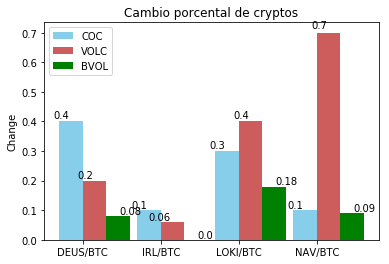

In [117]:
import numpy as np
import matplotlib.pyplot as plt

chng, volch, bvolc = [], [], []

for i in top:
    chng.append(top[i][0])
    volch.append(top[i][1])
    bvolc.append(top[i][2])
    
fig, ax = plt.subplots()
rects1 = ax.bar(ind - 0.5*width, chng, width, color='SkyBlue', label='COC')
rects2 = ax.bar(ind + 0.5*width, volch, width, color='IndianRed', label='VOLC')
rects3 = ax.bar(ind + 1.5*width, bvolc, width, color='Green', label='BVOL')

ind = np.arange(len(chng))  # the x locations for the groups
width = 0.30  # the width of the bars

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Change')
ax.set_title('Cambio porcental de cryptos')

ax.set_xticks(ind)
ax.set_xticklabels(list(top.keys()))
ax.legend()

autolabel(rects1, "left")
autolabel(rects2, "left")
autolabel(rects3, "right")

plt.show()